In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 1s (339 kB/s)
Selecting previously unselected package rar.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
#!unrar x "/content/drive/MyDrive/datasets.rar" "/content/drive/MyDrive/data"


In [58]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import tensorflow
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.utils.data_utils import get_file
import json
from matplotlib import pyplot as plt
import cv2 as cv
from PIL import Image

In [56]:
def load_im(path):
  img = keras.preprocessing.image.load_img(path, target_size = (224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  img = preprocess_input(img)
  return img

In [37]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [39]:

def get_predictions(preds, top = 5):
  global CLASS_INDEX
  if CLASS_INDEX is None:
    fpath = get_file('imagenet_class_index.json',
                    CLASS_INDEX_PATH,
                    cache_subdir = 'models')
    CLASS_INDEX = json.load(open(fpath))
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results

In [29]:
vgg16 = VGG16(weights = 'imagenet')

553476096/553467096 [==============================] - 4s 0us/step


[[('n03770679', 'minivan', 0.6798975), ('n03769881', 'minibus', 0.111859016), ('n03670208', 'limousine', 0.038753785), ('n02814533', 'beach_wagon', 0.028409822), ('n03796401', 'moving_van', 0.01923007)]]


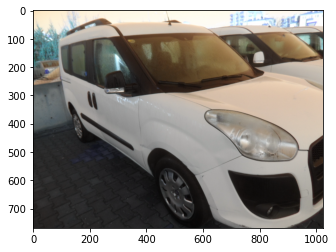

In [60]:
image = load_im('/content/drive/MyDrive/data/datasets/dsarvis/101.jpg')
preds = vgg16.predict(image)
print(get_predictions(preds))

plt.imshow(cv.imread('/content/drive/MyDrive/data/datasets/dsarvis/101.jpg'))

In [45]:
from collections import Counter, defaultdict
import os

In [65]:
def get_car_cats():
  j = 0
  d = defaultdict(float)
  file_path = '/content/drive/MyDrive/data/datasets/ds'
  for file in os.listdir(file_path):
    abs_path = os.path.join(file_path, file)
    img = load_im(abs_path)
    preds = get_predictions(vgg16.predict(img))
    for i in preds[0]:
      d[i[0:2]] += i[2]
    j += 1
    if j % 50 == 0:
      print(j, 'completed')
  return Counter(d)


In [66]:
cat_counts = get_car_cats()

50 completed
100 completed
150 completed
200 completed
250 completed
300 completed
350 completed
400 completed
450 completed
500 completed
550 completed
600 completed
650 completed
700 completed
750 completed
800 completed
850 completed
900 completed
950 completed
1000 completed
1050 completed
1100 completed
1150 completed
1200 completed
1250 completed
1300 completed
1350 completed
1400 completed
1450 completed
1500 completed
1550 completed
1600 completed
1650 completed
1700 completed
1750 completed
1800 completed
1850 completed
1900 completed
1950 completed
2000 completed
2050 completed
2100 completed
2150 completed
2200 completed
2250 completed
2300 completed
2350 completed
2400 completed
2450 completed
2500 completed
2550 completed
2600 completed
2650 completed
2700 completed
2750 completed
2800 completed
2850 completed
2900 completed
2950 completed
3000 completed
3050 completed
3100 completed
3150 completed
3200 completed
3250 completed
3300 completed
3350 completed
3400 completed


In [67]:
category_list = [k for k, v in cat_counts.most_common()[:50]]

In [73]:
def get_num_of_car_categories(cat_list):
  i = 0
  number_of_cats = 0
  bad_list = []
  file_path = '/content/drive/MyDrive/data/datasets/ds'
  for file in os.listdir(file_path):
    i += 1
    abs_path = os.path.join(file_path, file)
    img = load_im(abs_path)
    pred = get_predictions(vgg16.predict(img))
    for j in pred[0]:
      if j[0:2] in cat_list:
        number_of_cats += 1
        break
    if i % 50 == 0:
      print(i, 'completed')
  return number_of_cats

In [74]:
number_of_cats = get_num_of_car_categories(category_list)
print(number_of_cats)

50 completed
100 completed
150 completed
200 completed
250 completed
300 completed
350 completed
400 completed
450 completed
500 completed
550 completed
600 completed
650 completed
700 completed
750 completed
800 completed
850 completed
900 completed
950 completed
1000 completed
1050 completed
1100 completed
1150 completed
1200 completed
1250 completed
1300 completed
1350 completed
1400 completed
1450 completed
1500 completed
1550 completed
1600 completed
1650 completed
1700 completed
1750 completed
1800 completed
1850 completed
1900 completed
1950 completed
2000 completed
2050 completed
2100 completed
2150 completed
2200 completed
2250 completed
2300 completed
2350 completed
2400 completed
2450 completed
2500 completed
2550 completed
2600 completed
2650 completed
2700 completed
2750 completed
2800 completed
2850 completed
2900 completed
2950 completed
3000 completed
3050 completed
3100 completed
3150 completed
3200 completed
3250 completed
3300 completed
3350 completed
3400 completed


In [79]:
def car_or_not(file_path, cat_list):
  image = load_im(file_path)
  preds = get_predictions(vgg16.predict(image))
  for j in preds[0]:
    if j[0:2] in cat_list:
      print("Car")
      return
  print("Not a Car")

Car


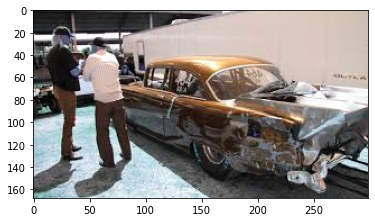

In [80]:
car_or_not('/content/drive/MyDrive/data/datasets/ds/x1005.JPEG', category_list)

plt.imshow(cv.imread('/content/drive/MyDrive/data/datasets/ds/x1005.JPEG'))

Not a Car


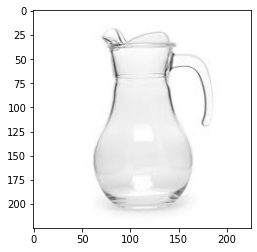

In [81]:
car_or_not('/content/drive/MyDrive/surahi.jpg', category_list)
plt.imshow(cv.imread('/content/drive/MyDrive/surahi.jpg'))